#TESTE CONTRA ATAQUES


In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
!pip install d6tflow
!pip install mplsoccer
#!pip install openpyxl

# use essa função para exportar o df_dados ele fica pronto onde eu marcar lá em baixo

# df_dados.to_csv('nome_do_arquivo.csv', index=False)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for luigi: filename=luigi-3.5.2-py3-none-any.whl size=1086266 sha256=03852bcfe8f5735f3601493c2a539e6bb818c11e110988cd6a89fbf1a87f9cde
  Stored in directory: /root/.cache/pip/wheels/da/d4/aa/66e30d4b172912c9742b56c1503f0e9ebbad04cb96807e9ba4
Successfully built luigi
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import d6tflow as d6t

Welcome to d6tflow! For Q&A see https://github.com/d6t/d6tflow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/dados_contra_ataques

'Cópia de contra_ataques10.csv'  'Cópia de players_contra_ataques10.csv'
'Cópia de contra_ataques1.csv'	 'Cópia de players_contra_ataques1.csv'
'Cópia de contra_ataques2.csv'	 'Cópia de players_contra_ataques2.csv'
'Cópia de contra_ataques3.csv'	 'Cópia de players_contra_ataques3.csv'
'Cópia de contra_ataques4.csv'	 'Cópia de players_contra_ataques4.csv'
'Cópia de contra_ataques5.csv'	 'Cópia de players_contra_ataques5.csv'
'Cópia de contra_ataques6.csv'	 'Cópia de players_contra_ataques6.csv'
'Cópia de contra_ataques7.csv'	 'Cópia de players_contra_ataques7.csv'
'Cópia de contra_ataques8.csv'	 'Cópia de players_contra_ataques8.csv'
'Cópia de contra_ataques9.csv'	 'Cópia de players_contra_ataques9.csv'
'Cópia de contra_ataques.csv'	 'Cópia de players_contra_ataques.csv'


In [ ]:
def carregar_dados(pasta):
    # Inicializar DataFrames vazios
    df_contra_ataques = pd.DataFrame()
    df_filtered_players = pd.DataFrame()

    # Iterar pelos arquivos na pasta
    for arquivo in os.listdir(pasta):
        caminho_arquivo = os.path.join(pasta, arquivo)

        # Verificar se o arquivo é do tipo "players" e concatená-lo ao DataFrame correspondente
        if "players_contra_ataques" in arquivo:
            df_temp = pd.read_csv(caminho_arquivo)
            df_filtered_players = pd.concat([df_filtered_players, df_temp], ignore_index=True)

        # Verificar se o arquivo é do tipo "contra_ataques" e concatená-lo ao DataFrame correspondente
        elif "contra_ataques" in arquivo and "players_contra_ataques" not in arquivo:
            df_temp = pd.read_csv(caminho_arquivo)
            df_contra_ataques = pd.concat([df_contra_ataques, df_temp], ignore_index=True)

    return df_contra_ataques, df_filtered_players

# Exemplo de uso:
pasta = 'drive/MyDrive/dados_contra_ataques'
df_contra_ataques, df_players = carregar_dados(pasta)

In [ ]:
df_contra_ataques

,home_team,game_id,frame_num,possession_event_type,sequence_id,possession_event_id,ball_x_start,ball_y_start,ball_z_start,ball_x_end,...,formatted_game_clock,period,campo_defesa,campo_ataque,campo,distancia_percorrida_x,distancia_percorrida_y,distancia_percorrida,formatted_game_clock_seconds,grande_area
0,False,4496,22873.0,PA,26,8886566.0,-47.361,7.233,0.50,-47.295,...,09:50,1,x < 0,x > 0,defesa,0.066,6.514,6.514334,590.0,0
1,False,4496,22939.0,PA,26,8886568.0,-47.295,0.719,0.25,-8.412,...,09:52,1,x < 0,x > 0,defesa,38.883,5.832,39.317934,592.0,0
2,False,4496,23001.0,PA,26,8886570.0,-8.412,6.551,1.20,1.796,...,09:54,1,x < 0,x > 0,defesa,10.208,0.413,10.216351,594.0,0
3,False,4496,23065.0,CH,26,8886572.0,1.796,6.138,0.00,-1.322,...,09:57,1,x < 0,x > 0,ataque,3.118,0.641,3.183207,597.0,0
4,False,4496,26305.0,PA,32,8886642.0,-47.024,-4.180,0.55,7.985,...,11:45,1,x < 0,x > 0,defesa,55.009,20.019,58.538453,705.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13918,False,4605,148318.0,PA,7330,6659719.0,-20.161,-0.396,0.00,-5.771,...,78:34,2,x < 0,x > 0,defesa,14.390,8.443,16.684015,4714.0,0
13919,False,4605,148446.0,PA,7330,6659723.0,-5.771,-8.839,0.20,14.162,...,78:38,2,x < 0,x > 0,defesa,19.933,15.749,25.403848,4718.0,0
13920,False,4605,148542.0,PA,7330,6659736.0,14.162,-24.588,0.22,18.066,...,78:41,2,x < 0,x > 0,ataque,3.904,1.021,4.035301,4721.0,0
13921,True,4605,172825.0,PA,7373,6660434.0,47.524,-1.368,1.62,-3.588,...,92:11,2,x > 0,x < 0,defesa,51.112,25.424,57.086043,5531.0,0


In [ ]:
df_players

,game_ref_id,frame_num,team,team_id,player_id,shirt_number,visibility,confidence,x,y,vx,vy,vtot,ax,ay,atot,period
0,4466,3927,home,2.0,281.0,1,ESTIMATED,LOW,-29.860,5.591,-0.54,0.36,0.648999,0.9,7.993606e-13,9.000000e-01,1
1,4466,3927,home,2.0,151.0,3,ESTIMATED,LOW,6.596,27.497,0.48,1.26,1.348332,-0.9,3.197442e-12,9.000000e-01,1
2,4466,3927,home,2.0,1916.0,4,VISIBLE,LOW,0.288,-1.026,-0.60,-1.02,1.183385,0.9,-9.992007e-14,9.000000e-01,1
3,4466,3927,home,2.0,1894.0,6,ESTIMATED,LOW,3.214,14.814,-2.31,0.99,2.513205,0.0,-9.000000e-01,9.000000e-01,1
4,4466,3927,home,2.0,163.0,7,ESTIMATED,LOW,3.229,-2.996,0.15,0.48,0.502892,-0.9,0.000000e+00,9.000000e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991846,4585,188923,away,4.0,433.0,18,ESTIMATED,LOW,49.532,-31.000,-0.00,-0.66,0.660000,-0.9,9.000000e-01,1.272792e+00,2
4991847,4585,188923,away,4.0,10705.0,21,VISIBLE,LOW,45.471,-9.574,-0.18,-0.06,0.189737,-0.0,-1.598721e-12,1.598721e-12,2
4991848,4585,188923,away,4.0,2134.0,25,VISIBLE,MEDIUM,29.677,-20.048,-0.30,0.06,0.305941,0.9,3.197442e-12,9.000000e-01,2
4991849,4585,188923,away,4.0,103.0,27,VISIBLE,MEDIUM,36.920,-13.791,0.27,0.21,0.342053,-0.9,1.800000e+00,2.012461e+00,2


In [ ]:
df_contra_ataques.game_id.nunique()

170

In [ ]:
df_contra_ataques.sequence_id.nunique()

1735

In [ ]:
def identificar_lado_recuperacao(df):
    # Inicializar a coluna para o lado de recuperação
    df['lado_recuperacao'] = np.nan

    for sequence_id in df['sequence_id'].unique():
        seq_df = df[df['sequence_id'] == sequence_id]
        primeiro_evento = seq_df.iloc[0]  # Primeiro evento da sequência

        campo_defesa = primeiro_evento['campo_defesa']
        y = primeiro_evento['ball_y_start']

        if campo_defesa ==  'x < 0':  # Campo de defesa é x < 0
            if y > 0:
                lado = 'esquerdo'
            else:
                lado = 'direito'
        else:  # Campo de defesa é x > 0
            if y > 0:
                lado = 'direito'
            else:
                lado = 'esquerdo'

        # Atualizar a coluna para todos os eventos da sequência
        df.loc[seq_df.index, 'lado_recuperacao'] = lado

    return df

# Aplicando a função ao DataFrame de contra-ataques
df_contra_ataques = identificar_lado_recuperacao(df_contra_ataques)

<ipython-input-17-e4ba0b0697e6>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'esquerdo' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[seq_df.index, 'lado_recuperacao'] = lado


In [ ]:
class Jogada:

    @staticmethod
    def jogador_esta_a_frente_bola(player_x, ball_x, campo_ataque):
        if campo_ataque == 'x > 0':
            return player_x >= ball_x
        else:
            return player_x <= ball_x

    @staticmethod
    def jogador_esta_a_atras_bola(player_x, ball_x, campo_defesa):
        if campo_defesa == 'x < 0':
            return player_x <= ball_x
        else:
            return player_x >= ball_x

    @staticmethod
    def calcular_pressao_do_jogador(distancia_bola):
        # Evita divisão por zero
        if distancia_bola == 0:
            return np.inf
        return 1 / distancia_bola

    @staticmethod
    def calcular_distancia_entre_a_bola(row, players):
        ball_x = row['ball_x_start']
        ball_y = row['ball_y_start']

        game = row['game_id']
        frame = row['frame_num']

        players_in_frame = players[(players['frame_num'] == frame) & (players['game_ref_id'] == game)].copy()
        players_in_frame['distancia_bola'] = np.sqrt((players_in_frame['x'] - ball_x)**2 + (players_in_frame['y'] - ball_y)**2)
        players_in_frame['pressao'] = players_in_frame['distancia_bola'].apply(Jogada.calcular_pressao_do_jogador)

        # Normalizar pressão
        max_pressao = players_in_frame['pressao'].replace([np.inf, -np.inf], np.nan).max()
        if not np.isnan(max_pressao) and max_pressao != 0:
            players_in_frame['pressao_normalizada'] = players_in_frame['pressao'].replace([np.inf, -np.inf], max_pressao) / max_pressao
        else:
            players_in_frame['pressao_normalizada'] = 0

        return players_in_frame

    @staticmethod
    def jogadores_defensores_atacantes(df_jogada, players):
        df_jogada = df_jogada.copy()
        for index, row in df_jogada.iterrows():

            jogadores = Jogada.calcular_distancia_entre_a_bola(row, players)
            home_team = 'home' if row['home_team'] else 'away'

            jogadores_atras_bola = jogadores.apply(
                lambda player: Jogada.jogador_esta_a_atras_bola(player['x'], row['ball_x_start'], row['campo_ataque']),
                axis=1
            )

            jogadores_frente_bola = jogadores.apply(
                lambda player: Jogada.jogador_esta_a_frente_bola(player['x'], row['ball_x_start'], row['campo_ataque']),
                axis=1
            )
            # Jogadores defensores: atrás da linha x da bola e próximos (<= 5 metros)
            jogadores_defensores = jogadores[
                ((jogadores['distancia_bola'] <= 3) | (jogadores_atras_bola)) & (jogadores['team'] != (home_team))
            ].copy()

            # Jogadores atacantes: à frente da linha x da bola e próximos (<= 5 metros)
            jogadores_atacantes = jogadores[
                ((jogadores['distancia_bola'] <= 3) | (jogadores_frente_bola)) & (jogadores['team'] == home_team)
            ].copy()

            jogadores_defensores.drop_duplicates(subset='player_id', keep='first', inplace=True)
            jogadores_atacantes.drop_duplicates(subset='player_id', keep='first', inplace=True)

            df_jogada.at[index, 'jogadores_defensores'] = jogadores_defensores
            df_jogada.at[index, 'jogadores_atacantes'] = jogadores_atacantes

            pressao_defesa = jogadores_defensores['pressao_normalizada'].sum()
            pressao_ataque = jogadores_atacantes['pressao_normalizada'].sum()

            df_jogada.at[index, 'pressao_defesa'] = pressao_defesa
            df_jogada.at[index, 'pressao_ataque'] = pressao_ataque

        return df_jogada

    @staticmethod
    def calcular_pressao_total(jogadores):
        return jogadores['pressao_normalizada'].sum() if not jogadores.empty else 0

In [ ]:
df_contra_ataques_com_jogadores = Jogada().jogadores_defensores_atacantes(df_contra_ataques, df_players)

In [ ]:
df_contra_ataques_com_jogadores

,home_team,game_id,frame_num,possession_event_type,sequence_id,possession_event_id,ball_x_start,ball_y_start,ball_z_start,ball_x_end,...,distancia_percorrida_x,distancia_percorrida_y,distancia_percorrida,formatted_game_clock_seconds,grande_area,lado_recuperacao,jogadores_defensores,jogadores_atacantes,pressao_defesa,pressao_ataque
0,False,4496,22873.0,PA,26,8886566.0,-47.361,7.233,0.50,-47.295,...,0.066,6.514,6.514334,590.0,0,esquerdo,NaN,NaN,1.951065,3.729199
1,False,4496,22939.0,PA,26,8886568.0,-47.295,0.719,0.25,-8.412,...,38.883,5.832,39.317934,592.0,0,esquerdo,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,4.805804,6.617937
2,False,4496,23001.0,PA,26,8886570.0,-8.412,6.551,1.20,1.796,...,10.208,0.413,10.216351,594.0,0,esquerdo,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.413613,1.726868
3,False,4496,23065.0,CH,26,8886572.0,1.796,6.138,0.00,-1.322,...,3.118,0.641,3.183207,597.0,0,esquerdo,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.151884,1.022437
4,False,4496,26305.0,PA,32,8886642.0,-47.024,-4.180,0.55,7.985,...,55.009,20.019,58.538453,705.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.601580,5.353967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13918,False,4605,148318.0,PA,7330,6659719.0,-20.161,-0.396,0.00,-5.771,...,14.390,8.443,16.684015,4714.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.248373,1.787458
13919,False,4605,148446.0,PA,7330,6659723.0,-5.771,-8.839,0.20,14.162,...,19.933,15.749,25.403848,4718.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.358075,1.527566
13920,False,4605,148542.0,PA,7330,6659736.0,14.162,-24.588,0.22,18.066,...,3.904,1.021,4.035301,4721.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.387259,1.350908
13921,True,4605,172825.0,PA,7373,6660434.0,47.524,-1.368,1.62,-3.588,...,51.112,25.424,57.086043,5531.0,0,esquerdo,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,6.683074,7.914205


In [ ]:
def take_off_na(df):
    sequences_with_na = df[df.isna().any(axis=1)]['sequence_id'].unique()
    df = df[~df['sequence_id'].isin(sequences_with_na)]
    return df

df_contra_ataques_com_jogadores = take_off_na(df_contra_ataques_com_jogadores)

In [ ]:
df_contra_ataques_com_jogadores

,home_team,game_id,frame_num,possession_event_type,sequence_id,possession_event_id,ball_x_start,ball_y_start,ball_z_start,ball_x_end,...,distancia_percorrida_x,distancia_percorrida_y,distancia_percorrida,formatted_game_clock_seconds,grande_area,lado_recuperacao,jogadores_defensores,jogadores_atacantes,pressao_defesa,pressao_ataque
4,False,4496,26305.0,PA,32,8886642.0,-47.024,-4.180,0.55,7.985,...,55.009,20.019,58.538453,705.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.601580,5.353967
5,False,4496,26533.0,CH,32,8886644.0,7.985,-24.199,0.00,7.931,...,0.054,0.213,0.219738,712.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.843968,1.037371
6,False,4496,26540.0,PA,32,8886645.0,7.931,-24.412,0.00,-7.067,...,14.998,2.915,15.278653,713.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.073985,1.193028
7,False,4496,26582.0,PA,32,8886646.0,-7.067,-27.327,0.11,31.859,...,38.926,0.995,38.938715,714.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.659598,2.309435
8,False,4496,26725.0,CL,32,8889226.0,31.859,-28.322,0.64,47.783,...,15.924,25.045,29.678710,719.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,0.200924,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13918,False,4605,148318.0,PA,7330,6659719.0,-20.161,-0.396,0.00,-5.771,...,14.390,8.443,16.684015,4714.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.248373,1.787458
13919,False,4605,148446.0,PA,7330,6659723.0,-5.771,-8.839,0.20,14.162,...,19.933,15.749,25.403848,4718.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.358075,1.527566
13920,False,4605,148542.0,PA,7330,6659736.0,14.162,-24.588,0.22,18.066,...,3.904,1.021,4.035301,4721.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.387259,1.350908
13921,True,4605,172825.0,PA,7373,6660434.0,47.524,-1.368,1.62,-3.588,...,51.112,25.424,57.086043,5531.0,0,esquerdo,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,6.683074,7.914205


In [ ]:
colunas_verificadas = ['jogadores_atacantes', 'jogadores_defensores']

# Avaliar se há algum DataFrame vazio nas colunas
filtro = df_contra_ataques_com_jogadores[colunas_verificadas].applymap(
    lambda x: isinstance(x, pd.DataFrame) and x.empty
).any(axis=1)

# Adicionar uma coluna auxiliar para marcar as linhas que devem ser removidas
df_contra_ataques_com_jogadores['remover'] = df_contra_ataques_com_jogadores['sequence_id'].isin(
    df_contra_ataques_com_jogadores.loc[filtro, 'sequence_id']
)

# Filtrar para remover as linhas com sequence_id que devem ser removidos
df_contra_ataques_com_jogadores = df_contra_ataques_com_jogadores[~df_contra_ataques_com_jogadores['remover']].drop(columns=['remover'])

<ipython-input-40-790aeb1c4d0d>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro = df_contra_ataques_com_jogadores[colunas_verificadas].applymap(
<ipython-input-40-790aeb1c4d0d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_contra_ataques_com_jogadores['remover'] = df_contra_ataques_com_jogadores['sequence_id'].isin(


In [ ]:
filtro = df_contra_ataques_com_jogadores[colunas_verificadas].applymap(
    lambda x: isinstance(x, pd.DataFrame) and x.empty
).any(axis=1)
filtro[filtro == True]

<ipython-input-43-ad1c3259e27d>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro = df_contra_ataques_com_jogadores[colunas_verificadas].applymap(


,0


In [ ]:
df_contra_ataques_com_jogadores

,home_team,game_id,frame_num,possession_event_type,sequence_id,possession_event_id,ball_x_start,ball_y_start,ball_z_start,ball_x_end,...,distancia_percorrida_x,distancia_percorrida_y,distancia_percorrida,formatted_game_clock_seconds,grande_area,lado_recuperacao,jogadores_defensores,jogadores_atacantes,pressao_defesa,pressao_ataque
4,False,4496,26305.0,PA,32,8886642.0,-47.024,-4.180,0.55,7.985,...,55.009,20.019,58.538453,705.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.601580,5.353967
5,False,4496,26533.0,CH,32,8886644.0,7.985,-24.199,0.00,7.931,...,0.054,0.213,0.219738,712.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.843968,1.037371
6,False,4496,26540.0,PA,32,8886645.0,7.931,-24.412,0.00,-7.067,...,14.998,2.915,15.278653,713.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.073985,1.193028
7,False,4496,26582.0,PA,32,8886646.0,-7.067,-27.327,0.11,31.859,...,38.926,0.995,38.938715,714.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.659598,2.309435
8,False,4496,26725.0,CL,32,8889226.0,31.859,-28.322,0.64,47.783,...,15.924,25.045,29.678710,719.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,0.200924,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13918,False,4605,148318.0,PA,7330,6659719.0,-20.161,-0.396,0.00,-5.771,...,14.390,8.443,16.684015,4714.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.248373,1.787458
13919,False,4605,148446.0,PA,7330,6659723.0,-5.771,-8.839,0.20,14.162,...,19.933,15.749,25.403848,4718.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.358075,1.527566
13920,False,4605,148542.0,PA,7330,6659736.0,14.162,-24.588,0.22,18.066,...,3.904,1.021,4.035301,4721.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.387259,1.350908
13921,True,4605,172825.0,PA,7373,6660434.0,47.524,-1.368,1.62,-3.588,...,51.112,25.424,57.086043,5531.0,0,esquerdo,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,6.683074,7.914205


In [ ]:
sequences = df_contra_ataques_com_jogadores.value_counts('sequence_id')

filtro = df_contra_ataques_com_jogadores['sequence_id'].apply(lambda sequence_id: sequences.loc[sequence_id] > 2)
df_contra_ataques_com_jogadores = df_contra_ataques_com_jogadores[filtro].copy()
df_contra_ataques_com_jogadores

,home_team,game_id,frame_num,possession_event_type,sequence_id,possession_event_id,ball_x_start,ball_y_start,ball_z_start,ball_x_end,...,distancia_percorrida_x,distancia_percorrida_y,distancia_percorrida,formatted_game_clock_seconds,grande_area,lado_recuperacao,jogadores_defensores,jogadores_atacantes,pressao_defesa,pressao_ataque
4,False,4496,26305.0,PA,32,8886642.0,-47.024,-4.180,0.55,7.985,...,55.009,20.019,58.538453,705.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.601580,5.353967
5,False,4496,26533.0,CH,32,8886644.0,7.985,-24.199,0.00,7.931,...,0.054,0.213,0.219738,712.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.843968,1.037371
6,False,4496,26540.0,PA,32,8886645.0,7.931,-24.412,0.00,-7.067,...,14.998,2.915,15.278653,713.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.073985,1.193028
7,False,4496,26582.0,PA,32,8886646.0,-7.067,-27.327,0.11,31.859,...,38.926,0.995,38.938715,714.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.659598,2.309435
8,False,4496,26725.0,CL,32,8889226.0,31.859,-28.322,0.64,47.783,...,15.924,25.045,29.678710,719.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,0.200924,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13916,False,4605,89059.0,PA,7222,6657915.0,-4.311,-26.752,0.35,2.758,...,7.069,6.597,9.669083,2736.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.288415,2.114881
13917,False,4605,89129.0,CH,7222,6657919.0,2.758,-20.155,0.05,7.719,...,4.961,4.464,6.673741,2739.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.790367,1.471300
13918,False,4605,148318.0,PA,7330,6659719.0,-20.161,-0.396,0.00,-5.771,...,14.390,8.443,16.684015,4714.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.248373,1.787458
13919,False,4605,148446.0,PA,7330,6659723.0,-5.771,-8.839,0.20,14.162,...,19.933,15.749,25.403848,4718.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.358075,1.527566


In [ ]:
from mplsoccer import Pitch

def plot_play(df, players_df, sequence_id, plot_play_after=False):
    # Filtrar os eventos pelo sequence_id
    play_events = df[df['sequence_id'] == sequence_id].copy()

    actions = len(play_events)

    # Ajustar as coordenadas da bola
    play_events['ball_x_start'] = (play_events['ball_x_start'] + 52.5) * (105/105)
    play_events['ball_y_start'] = (play_events['ball_y_start'] + 34) * (68/68)

    play_events['ball_x_end'] = (play_events['ball_x_end'] + 52.5) * (105/105)
    play_events['ball_y_end'] = (play_events['ball_y_end'] + 34) * (68/68)

    # Criar o campo
    fig, ax = plt.subplots(nrows = actions, ncols =1, figsize=(16, 8 * (actions))) #, figsize=(10, 7)
    pitch = Pitch(line_color="black")

    for i in range(actions):

      pitch.draw(ax = ax[i], figsize=(16, 16))

      for j in range(actions):
          x_start = play_events.iloc[j]['ball_x_start']
          y_start = play_events.iloc[j]['ball_y_start']
          x_end = play_events.iloc[j]['ball_x_end']
          y_end = play_events.iloc[j]['ball_y_end']

          if j == actions - 1:
            pitch.arrows(x_start, y_start, x_end, y_end,
                      ax=ax[i], color='black', width=2, headwidth=4, headlength=4, alpha=0.7)
          if i == j:
            pitch.arrows(x_start, y_start, x_end, y_end,
                      ax=ax[i], color='red', width=2, headwidth=4, headlength=4, alpha=0.7)
          else:
            pitch.arrows(x_start, y_start, x_end, y_end,
                      ax=ax[i], color='blue', width=2, headwidth=4, headlength=4, alpha=0.7)

      # Incluir posições dos jogadores

      action_frame = play_events.iloc[i]
      frame_players = players_df[(players_df['frame_num'] == action_frame['frame_num']) & (players_df['game_ref_id'] == action_frame['game_id'])]

      for _, player in frame_players.iterrows():
          x_player = (player['x'] + 52.5) * (105/105)
          y_player = (player['y'] + 34) * (68/68)
          color = 'green' if player['team'] == 'home' else 'red'
          pitch.scatter(x_player, y_player, ax=ax[i], color=color, s=100, edgecolors='black', alpha=0.6)
          ax[i].text(x_player, y_player, str(player['shirt_number']), color='black', ha='center', va='center', fontsize=8)

      ax[i].set_title(f"Contra-ataque: Sequência ID {sequence_id} Ação {i} Tipo {action_frame['possession_event_type']}", fontsize=13)

    plt.show()

In [ ]:
sequences = df_contra_ataques_com_jogadores.value_counts('sequence_id')

filtro = df_contra_ataques_com_jogadores['sequence_id'].apply(lambda sequence_id: sequences.loc[sequence_id] < 10)
teste = df_contra_ataques_com_jogadores[filtro].copy()
teste

,home_team,game_id,frame_num,possession_event_type,sequence_id,possession_event_id,ball_x_start,ball_y_start,ball_z_start,ball_x_end,...,distancia_percorrida_x,distancia_percorrida_y,distancia_percorrida,formatted_game_clock_seconds,grande_area,lado_recuperacao,jogadores_defensores,jogadores_atacantes,pressao_defesa,pressao_ataque
4,False,4496,26305.0,PA,32,8886642.0,-47.024,-4.180,0.55,7.985,...,55.009,20.019,58.538453,705.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.601580,5.353967
5,False,4496,26533.0,CH,32,8886644.0,7.985,-24.199,0.00,7.931,...,0.054,0.213,0.219738,712.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.843968,1.037371
6,False,4496,26540.0,PA,32,8886645.0,7.931,-24.412,0.00,-7.067,...,14.998,2.915,15.278653,713.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.073985,1.193028
7,False,4496,26582.0,PA,32,8886646.0,-7.067,-27.327,0.11,31.859,...,38.926,0.995,38.938715,714.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.659598,2.309435
8,False,4496,26725.0,CL,32,8889226.0,31.859,-28.322,0.64,47.783,...,15.924,25.045,29.678710,719.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,0.200924,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13916,False,4605,89059.0,PA,7222,6657915.0,-4.311,-26.752,0.35,2.758,...,7.069,6.597,9.669083,2736.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.288415,2.114881
13917,False,4605,89129.0,CH,7222,6657919.0,2.758,-20.155,0.05,7.719,...,4.961,4.464,6.673741,2739.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.790367,1.471300
13918,False,4605,148318.0,PA,7330,6659719.0,-20.161,-0.396,0.00,-5.771,...,14.390,8.443,16.684015,4714.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.248373,1.787458
13919,False,4605,148446.0,PA,7330,6659723.0,-5.771,-8.839,0.20,14.162,...,19.933,15.749,25.403848,4718.0,0,direito,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.358075,1.527566


In [ ]:
teste[teste.sequence_id == 33]

,home_team,game_id,frame_num,possession_event_type,sequence_id,possession_event_id,ball_x_start,ball_y_start,ball_z_start,ball_x_end,...,distancia_percorrida_x,distancia_percorrida_y,distancia_percorrida,formatted_game_clock_seconds,grande_area,lado_recuperacao,jogadores_defensores,jogadores_atacantes,pressao_defesa,pressao_ataque
9,True,4496,27354.0,PA,33,8886663.0,47.783,-3.277,5.88,4.402000,...,43.381000,27.828000,51.539390,740.0,0,esquerdo,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,4.016211,6.012882
10,True,4496,27425.0,PA,33,8886670.0,4.402,-31.105,1.03,2.887000,...,1.515000,1.465000,2.107475,742.0,0,esquerdo,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.659842,1.675807
11,True,4496,27445.0,BC,33,8889332.0,2.887,-29.640,0.05,-44.007000,...,46.894000,7.085000,47.426200,743.0,0,esquerdo,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,2.003727,1.691995
12,True,4496,27667.0,CR,33,8889335.0,-44.007,-22.555,0.05,-46.091647,...,2.084647,1.444412,2.536154,750.0,0,esquerdo,game_ref_id frame_num team team_id...,game_ref_id frame_num team team_id...,1.399611,1.000000


In [ ]:
teste.columns

Index(['home_team', 'game_id', 'frame_num', 'possession_event_type',
       'sequence_id', 'possession_event_id', 'ball_x_start', 'ball_y_start',
       'ball_z_start', 'ball_x_end', 'ball_y_end', 'ball_z_end',
       'formatted_game_clock', 'period', 'campo_defesa', 'campo_ataque',
       'campo', 'distancia_percorrida_x', 'distancia_percorrida_y',
       'distancia_percorrida', 'formatted_game_clock_seconds', 'grande_area',
       'lado_recuperacao', 'jogadores_defensores', 'jogadores_atacantes',
       'pressao_defesa', 'pressao_ataque'],
      dtype='object')

In [ ]:
plot_play(teste, df_players, 115)

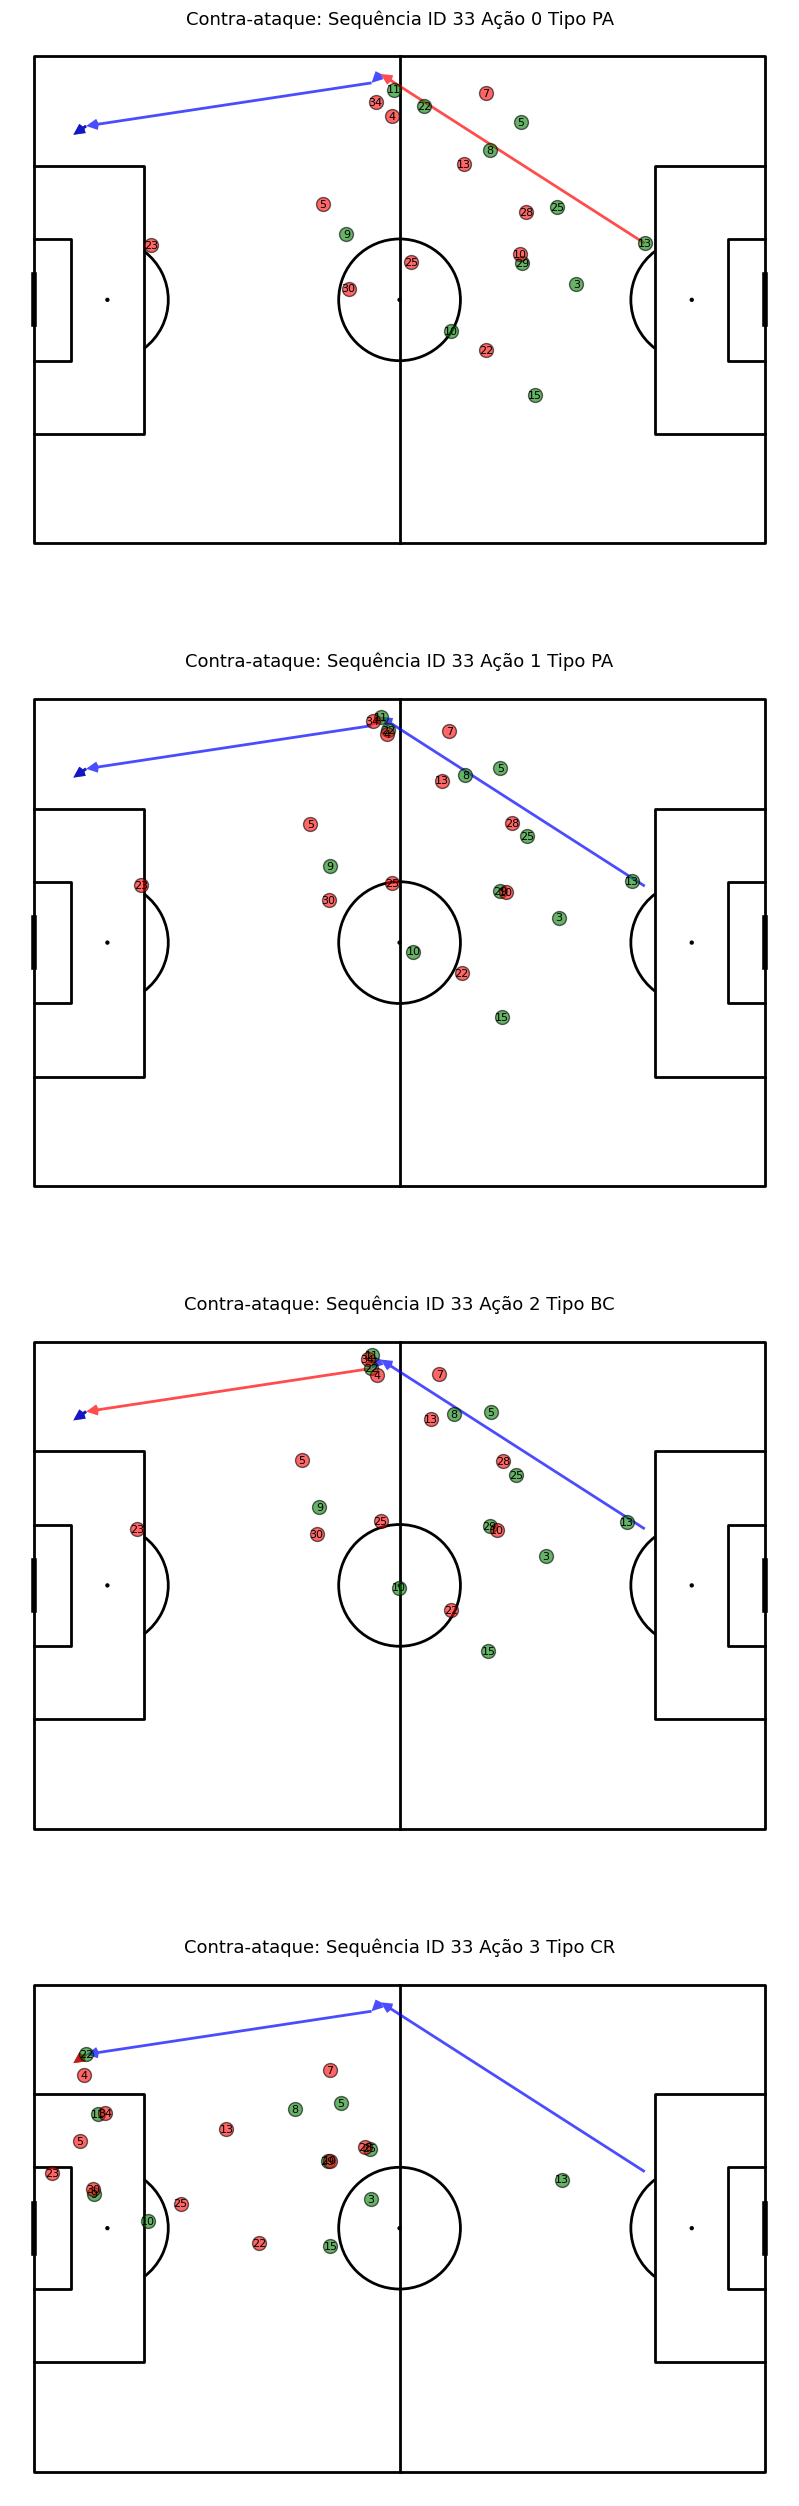

In [ ]:
plot_play(teste, df_players, 33)

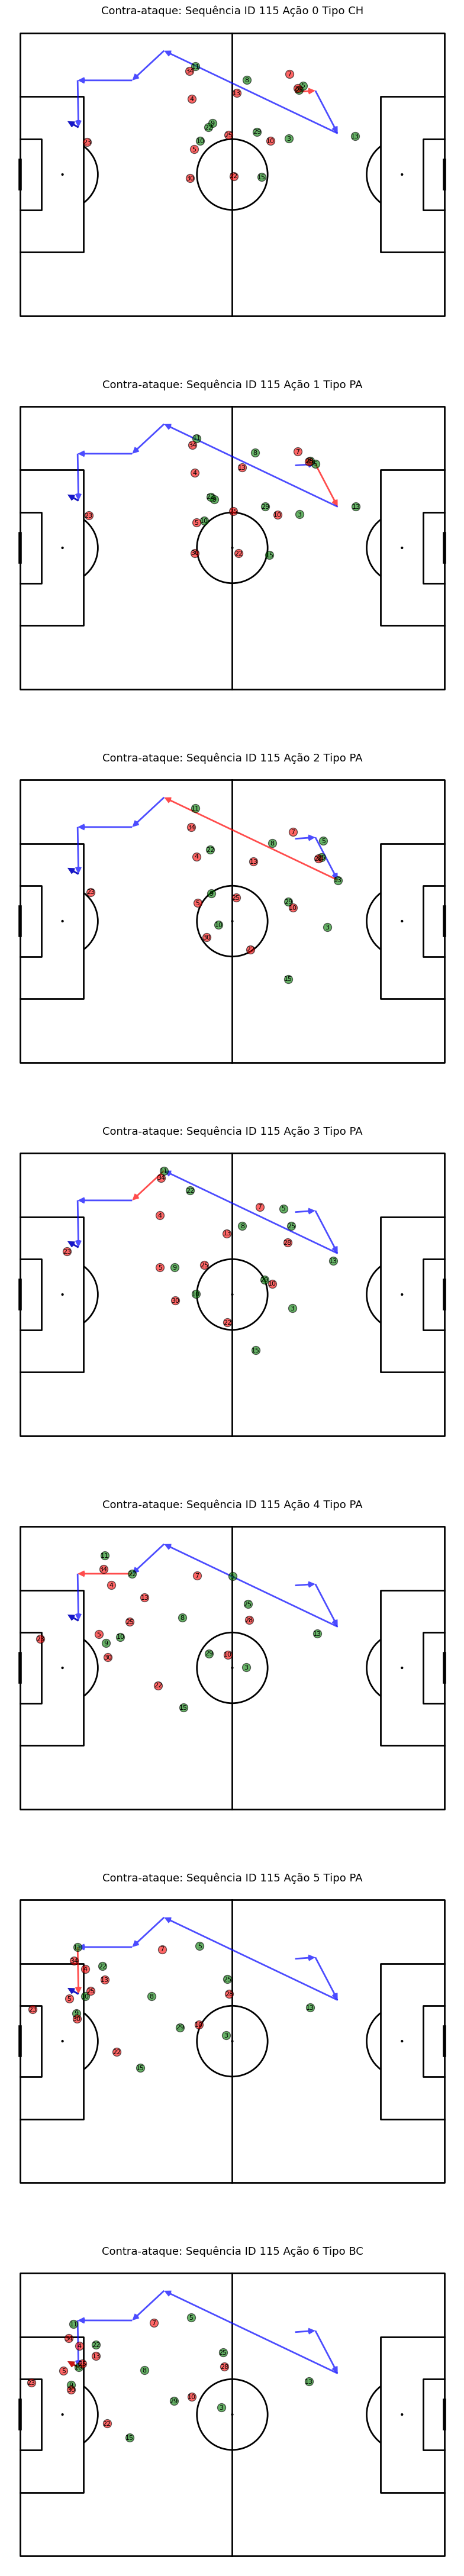

In [ ]:
plot_play(teste, df_players, 115)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
class Kmeans():

  #Alternativa
  @staticmethod
  def cal_jogadores_atacantes_defensores(dados, sequence):
    print('----------------------')
    dados = dados.query(f'sequence_id == {sequence}')
    if dados.iloc[0]['campo_defesa'] == 'x < 0':
      campo_ataque = 1
    else:
      campo_ataque = -1

    for index, row in dados.iterrows():
      print(len(row['jogadores_atacantes']))
      if row['ball_x'] * campo_ataque > 0:
        return len(row['jogadores_atacantes']), len(row['jogadores_defensores'])
    return 0, 0

  @staticmethod
  def chegou_na_grande_area(dados, sequence_id):
    seq_df = dados[dados['sequence_id'] == sequence_id]
    return any(seq_df['grande_area'])

  @staticmethod
  def calcular_velocidade_media(distancia, tempo):
    if tempo <= 0:
      tempo = 0.1
    return distancia / tempo

  @staticmethod
  def calcular_tempo_total(inicio, final):
    pass

  @staticmethod
  def calcular_jogadores_time(dados):

    aliados = 0
    oponentes = 0

    jogadores = dados.team.value_counts()

    if len(jogadores) == 2:
      oponentes = int(jogadores.loc['away'])
      aliados = int(jogadores.loc['home'])

    return aliados, oponentes

  @staticmethod
  def calc_atacantes_atacando(jogadores_atacantes, ball_x):
    if ball_x < 0:
      atacantes = jogadores_atacantes[jogadores_atacantes['x'] > 0]
    else:
      atacantes = jogadores_atacantes[jogadores_atacantes['x'] <= 0]

    return len(atacantes)

  @staticmethod
  def calc_defensores_defendendo(jogadores_defensores, ball_x):
    if ball_x < 0:
      defensores = jogadores_defensores[jogadores_defensores['x'] > 0]
    else:
      defensores = jogadores_defensores[jogadores_defensores['x'] <= 0]

    return len(defensores)

  # calcula jogadores defensores próximos
  @staticmethod
  def calc_pressao_def(jogadores_defensores):
    defensores = jogadores_defensores[jogadores_defensores['distancia_bola'] <= 3]
    return defensores['pressao_normalizada'].sum()

  @staticmethod
  def preparar_dados(dados):

    resultados = []

    distancia_total_x = dados.groupby('sequence_id')['distancia_percorrida_x'].sum()
    distancia_total_y = dados.groupby('sequence_id')['distancia_percorrida_y'].sum()
    distancias_totais_pecorridas = dados.groupby('sequence_id')['distancia_percorrida'].sum()

    sequencias = dados.sequence_id.unique()#.tolist()

    for sequencia in sequencias:

      dados_preparados = []

      inicio = dados.query(f'sequence_id == {sequencia}').iloc[0]
      final = dados.query(f'sequence_id == {sequencia}').iloc[-1]

      tempo_inicial = inicio['formatted_game_clock_seconds']
      tempo_final = final['formatted_game_clock_seconds']

      sequence_id_current = inicio['sequence_id']

      distancia_percorrida_total_x = distancia_total_x.loc[sequence_id_current]
      distancia_percorrida_total_y = distancia_total_y.loc[sequence_id_current]
      distancia_percorrida_total = distancias_totais_pecorridas.loc[sequence_id_current]

      #distancia_percorrida_total_x = dados.query('sequence_id == @sequence_id_current').iloc[:-1]['distancia_percorrida_x'].sum()
      #distancia_percorrida_total_y = dados.query('sequence_id == @sequence_id_current').iloc[:-1]['distancia_percorrida_y'].sum()
      #distancia_percorrida_total = dados.query('sequence_id == @sequence_id_current').iloc[:-1]['distancia_percorrida'].sum()

      tempo_total = tempo_final - tempo_inicial

      # jogadores_aliados, jogadores_adversarios = Kmeans.cal_jogadores_atacantes_defensores(dados, row['sequence_id'])

      jogadores_defensores_na_defesa = Kmeans.calc_defensores_defendendo(inicio['jogadores_defensores'], inicio['ball_x_start'])
      jogadores_atacantes_no_ataque = Kmeans.calc_atacantes_atacando(inicio['jogadores_atacantes'], inicio['ball_x_start'])

      pressao_defesa = Kmeans.calc_pressao_def(inicio['jogadores_defensores'])
      velocidade_media_bola = Kmeans.calcular_velocidade_media(distancia_percorrida_total, tempo_total)
      pressao_media_bola = 0

      lado_recuperacao = inicio['lado_recuperacao']

      dados_preparados.append(tempo_total)
      dados_preparados.append(jogadores_defensores_na_defesa)
      dados_preparados.append(jogadores_atacantes_no_ataque)
      dados_preparados.append(distancia_percorrida_total_x)
      dados_preparados.append(distancia_percorrida_total_y)
      dados_preparados.append(distancia_percorrida_total)
      dados_preparados.append(velocidade_media_bola)
      dados_preparados.append(pressao_defesa)
      dados_preparados.append(lado_recuperacao)
      dados_preparados.append(Kmeans.chegou_na_grande_area(dados, inicio['sequence_id']))

      resultados.append(dados_preparados)
    return resultados

  @staticmethod
  def criar_modelo(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    return kmeans

In [ ]:
dados = Kmeans.preparar_dados(df_contra_ataques_com_jogadores)
df_dados = pd.DataFrame(dados, columns=['tempo_total', 'jogadores_defensores_na_defesa', 'jogadores_atacantes_no_ataque', 'distancia_percorrida_total_x',
                                        'distancia_percorrida_total_y', 'distancia_percorrida_total', 'velocidade_media_bola',
                                        'pressao_defesa_total', 'lado_recuperacao', 'grande_area'])

In [ ]:
df_dados

,tempo_total,jogadores_defensores_na_defesa,jogadores_atacantes_no_ataque,distancia_percorrida_total_x,distancia_percorrida_total_y,distancia_percorrida_total,velocidade_media_bola,pressao_defesa_total,lado_recuperacao,grande_area
0,14.0,1,0,124.911000,49.187000,142.654268,10.189591,0.000000,direito,False
1,10.0,3,1,93.874647,37.822412,103.609219,10.360922,0.000000,esquerdo,False
2,-454.0,3,1,142.045130,217.752783,290.106950,2901.069501,0.000000,direito,False
3,15.0,5,2,88.925837,59.349413,118.379755,7.891984,0.993793,esquerdo,False
4,48.0,5,3,223.902000,236.598000,352.873142,7.351524,0.000000,esquerdo,False
...,...,...,...,...,...,...,...,...,...,...
1443,55.0,5,2,76.959000,84.790000,120.106135,2.183748,0.000000,esquerdo,True
1444,7.0,1,0,39.616000,56.885000,73.568555,10.509794,1.000000,esquerdo,False
1445,9.0,4,1,59.712000,44.133000,77.272446,8.585827,0.000000,direito,True
1446,10.0,1,0,41.063000,35.747000,57.979499,5.797950,0.000000,direito,False


In [ ]:
df_dados.describe()

,tempo_total,jogadores_defensores_na_defesa,jogadores_atacantes_no_ataque,distancia_percorrida_total_x,distancia_percorrida_total_y,distancia_percorrida_total,velocidade_media_bola,pressao_defesa_total
count,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000
mean,36.871547,3.956492,1.605663,86.559415,68.217896,122.415790,161.049256,0.369749
std,877.216443,2.460224,1.836780,51.329317,58.003376,81.505700,636.022414,0.559744
min,-5198.000000,1.000000,0.000000,11.655000,2.465000,14.828784,0.016606,0.000000
25%,7.000000,2.000000,0.000000,53.941250,30.619000,71.690840,6.232134,0.000000
50%,11.000000,4.000000,1.000000,72.546500,50.173000,96.811829,7.834147,0.000000
75%,22.000000,6.000000,3.000000,106.984750,86.758000,150.152386,10.514061,1.000000
max,5322.000000,11.000000,9.000000,479.161353,448.313000,656.112818,6561.128181,6.795666


In [ ]:
df_dados_filtrado = df_dados.query('tempo_total <= 30 & tempo_total > 0') # & jogadores_aliados < 8 & jogadores_adversarios < 8')
df_dados_filtrado.shape

(1064, 10)

In [ ]:
df_dados_filtrado.grande_area.sum()

177

In [ ]:
df_sucesso = df_dados_filtrado.query('grande_area == True')
result_sucesso = df_sucesso.describe()

result_sucesso

,tempo_total,jogadores_defensores_na_defesa,jogadores_atacantes_no_ataque,distancia_percorrida_total_x,distancia_percorrida_total_y,distancia_percorrida_total,velocidade_media_bola,pressao_defesa_total
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,13.406780,3.723164,1.531073,81.199224,52.594031,107.389107,8.538698,0.411693
std,5.051278,2.394875,1.837240,27.510124,27.923060,35.778182,3.009045,0.651459
min,4.000000,1.000000,0.000000,42.417806,6.302726,49.853943,4.821727,0.000000
25%,10.000000,2.000000,0.000000,62.146000,31.071000,79.568871,6.600581,0.000000
50%,12.000000,3.000000,1.000000,75.138000,47.134000,102.636859,7.837548,0.000000
75%,17.000000,6.000000,3.000000,93.587000,70.141011,129.913010,9.186558,1.000000
max,27.000000,11.000000,8.000000,234.005000,127.933000,238.235290,23.730355,4.947958


In [ ]:
df_fracasso = df_dados_filtrado.query('grande_area == False')
result_fracasso = df_fracasso.describe()
result_fracasso

,tempo_total,jogadores_defensores_na_defesa,jogadores_atacantes_no_ataque,distancia_percorrida_total_x,distancia_percorrida_total_y,distancia_percorrida_total,velocidade_media_bola,pressao_defesa_total
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,10.720406,3.986471,1.615558,63.955570,47.765301,88.087619,9.207892,0.353181
std,6.272828,2.442069,1.841307,26.616131,31.955486,41.050353,3.477468,0.555016
min,1.000000,1.000000,0.000000,11.655000,2.465000,14.828784,2.033768,0.000000
25%,7.000000,2.000000,0.000000,45.979585,24.493500,61.547562,6.993541,0.000000
50%,9.000000,4.000000,1.000000,60.231000,40.911000,81.424082,8.564409,0.000000
75%,13.000000,6.000000,3.000000,77.552500,61.729235,104.857087,10.689616,1.000000
max,30.000000,11.000000,9.000000,202.861000,242.771000,305.578263,41.555886,6.795666


In [ ]:
result_fracasso.columns

Index(['tempo_total', 'jogadores_defensores_na_defesa',
       'jogadores_atacantes_no_ataque', 'distancia_percorrida_total_x',
       'distancia_percorrida_total_y', 'distancia_percorrida_total',
       'velocidade_media_bola', 'pressao_defesa_total'],
      dtype='object')

In [ ]:
dados_sucesso = result_sucesso.loc[['mean', '50%', 'std'], ['tempo_total','distancia_percorrida_total_y', 'velocidade_media_bola', 'pressao_defesa_total']]
dados_fracasso = result_fracasso.loc[['mean', '50%', 'std'], ['tempo_total','distancia_percorrida_total_y', 'velocidade_media_bola', 'pressao_defesa_total']]

In [ ]:
dados_sucesso['Distancia percorrida no eixo y (m)']

,Distancia percorrida no eixo y (m)
mean,47.765301
50%,40.911000
std,31.955486


In [ ]:
dados_sucesso.columns = ['Tempo total (s)', 'Distancia percorrida no eixo y (m)', 'Velocidade média (m/s)', 'Pressão de defesa (m)']
dados_fracasso.columns = ['Tempo total (s)', 'Distancia percorrida no eixo y (m)', 'Velocidade média (m/s)', 'Pressão de defesa (m)']

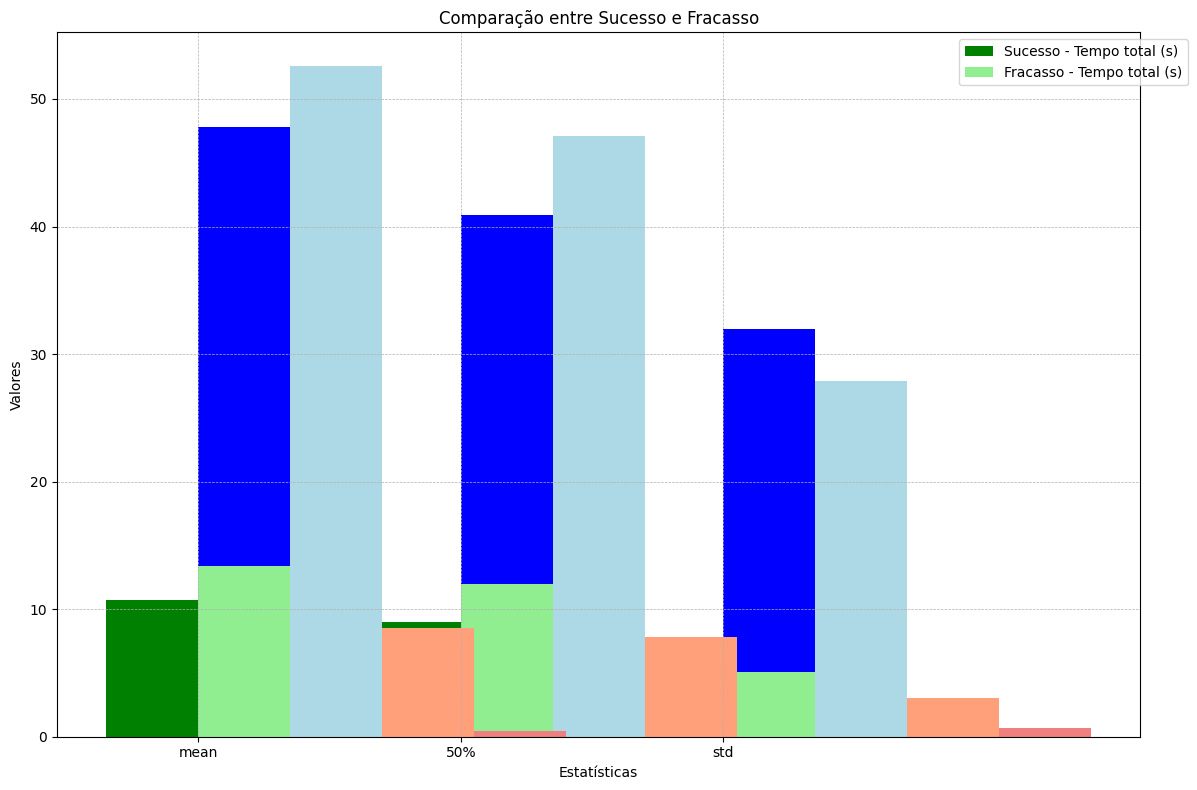

In [ ]:
# Configurações para o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Definindo as posições das barras
n = len(dados_sucesso.columns)
pos = np.arange(len(dados_sucesso.index))
largura = 0.35  # Largura das barras
offset = largura / 2

# Cores válidas
cores_sucesso = ['green', 'blue', 'orange', 'red']
cores_fracasso = ['lightgreen', 'lightblue', 'lightsalmon', 'lightcoral']

# Plotar sucesso
for i, coluna in enumerate(dados_sucesso.columns):
    ax.bar(pos - offset + i * largura, dados_sucesso[coluna], largura, color=cores_sucesso[i], edgecolor='none', label=f'Sucesso - {coluna}' if i == 0 else "")

# Plotar fracasso
for i, coluna in enumerate(dados_fracasso.columns):
    ax.bar(pos + offset + i * largura, dados_fracasso[coluna], largura, color=cores_fracasso[i], edgecolor='none', label=f'Fracasso - {coluna}' if i == 0 else "")

# Ajustar o eixo x
ax.set_xticks(pos)
ax.set_xticklabels(dados_sucesso.index, rotation=0)

# Adicionar grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionar legendas e rótulos
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.title('Comparação entre Sucesso e Fracasso')
plt.xlabel('Estatísticas')
plt.ylabel('Valores')

# Ajustar layout para evitar sobreposição com a legenda
plt.tight_layout()

# Exibir o gráfico
plt.show()

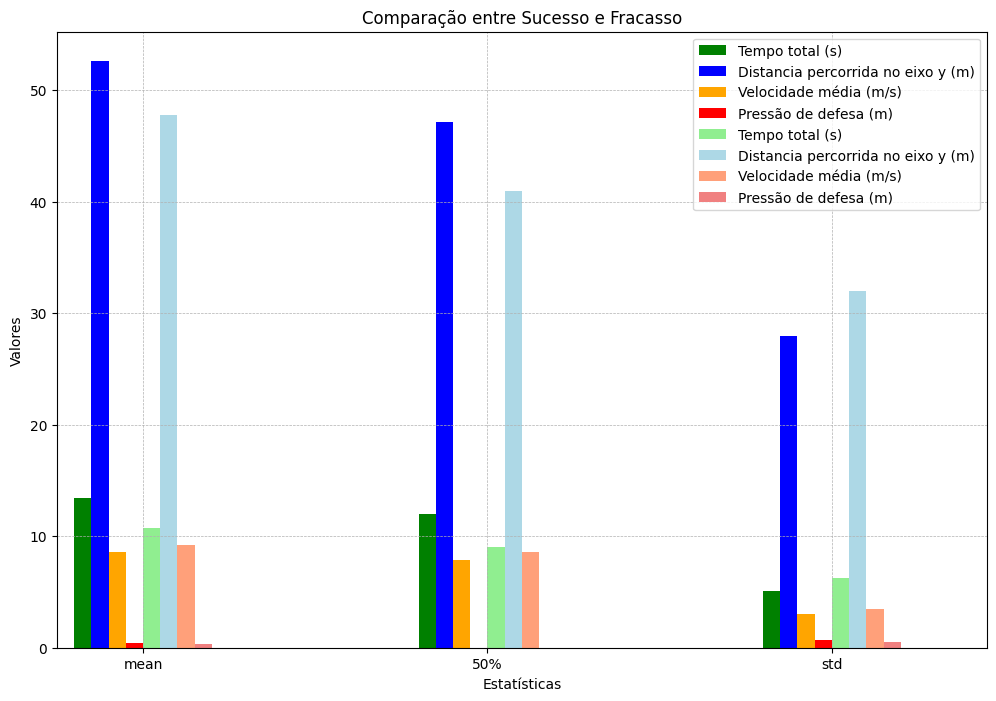

In [ ]:
# Plotar os dados
fig, ax = plt.subplots(figsize=(12, 8))

# Cores válidas
cores_sucesso = ['green', 'blue', 'orange', 'red']
cores_fracasso = ['lightgreen', 'lightblue', 'lightsalmon', 'lightcoral']

# Plotar sucesso
dados_sucesso.plot(kind='bar', ax=ax, position=1, width=0.2, color=cores_sucesso, edgecolor='none', label='Sucesso')

# Plotar fracasso
dados_fracasso.plot(kind='bar', ax=ax, position=0, width=0.2, color=cores_fracasso, edgecolor='none', label='Fracasso')

# Ajustar o eixo x
ax.set_xticks(range(len(dados_sucesso.index)))
ax.set_xticklabels(dados_sucesso.index, rotation=0)

# Adicionar grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionar legendas e rótulos
plt.legend()
plt.title('Comparação entre Sucesso e Fracasso')
plt.xlabel('Estatísticas')
plt.ylabel('Valores')

# Exibir o gráfico
plt.show()

In [ ]:
resultado = df_dados.groupby('lado_recuperacao').grande_area.sum()

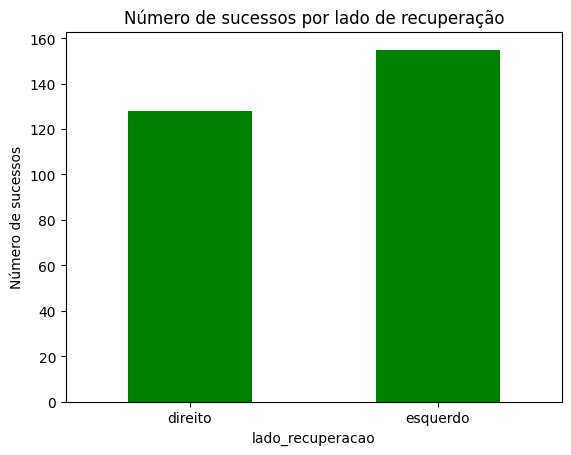

In [ ]:
resultado.plot(kind='bar', color='green', edgecolor=None)
plt.xticks(rotation=0)
plt.ylabel('Número de sucessos')
plt.title('Número de sucessos por lado de recuperação')
plt.show()

In [ ]:
df_dados_one_hot = pd.get_dummies(df_dados_filtrado, columns=['lado_recuperacao'])
df_dados_one_hot

,tempo_total,jogadores_defensores_na_defesa,jogadores_atacantes_no_ataque,distancia_percorrida_total_x,distancia_percorrida_total_y,distancia_percorrida_total,velocidade_media_bola,pressao_defesa_total,grande_area,lado_recuperacao_direito,lado_recuperacao_esquerdo
0,14.0,1,0,124.911000,49.187000,142.654268,10.189591,0.000000,False,True,False
1,10.0,3,1,93.874647,37.822412,103.609219,10.360922,0.000000,False,False,True
3,15.0,5,2,88.925837,59.349413,118.379755,7.891984,0.993793,False,False,True
5,18.0,1,0,80.797000,69.244000,115.228737,6.401597,0.000000,False,False,True
6,20.0,4,1,97.732000,93.629000,153.606448,7.680322,0.000000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1442,12.0,1,0,78.252000,45.115000,91.294830,7.607902,0.808169,False,False,True
1444,7.0,1,0,39.616000,56.885000,73.568555,10.509794,1.000000,False,False,True
1445,9.0,4,1,59.712000,44.133000,77.272446,8.585827,0.000000,True,True,False
1446,10.0,1,0,41.063000,35.747000,57.979499,5.797950,0.000000,False,True,False


In [ ]:
modelos = []
inercia = []
K = range(1, 11)
for k in K:
  kmeans = Kmeans.criar_modelo(df_dados_one_hot, k)
  inercia.append(kmeans.inertia_)
  modelos.append(kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

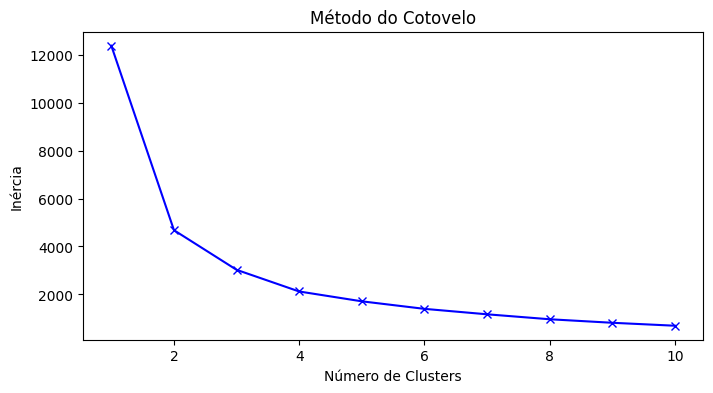

In [ ]:
# Plotar o gráfico do Cotovelo
K = range(1, 11)

plt.figure(figsize=(8, 4))
plt.plot(K, inercia, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
kmeans = Kmeans.criar_modelo(df_dados_one_hot, 4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df_dados_one_hot

,tempo_total,jogadores_defensores_na_defesa,jogadores_atacantes_no_ataque,distancia_percorrida_total_x,distancia_percorrida_total_y,distancia_percorrida_total,velocidade_media_bola,pressao_defesa_total,grande_area,lado_recuperacao_direito,lado_recuperacao_esquerdo
0,14.0,1,0,124.911000,49.187000,142.654268,10.189591,0.000000,False,True,False
1,10.0,3,1,93.874647,37.822412,103.609219,10.360922,0.000000,False,False,True
3,15.0,5,2,88.925837,59.349413,118.379755,7.891984,0.993793,False,False,True
5,18.0,1,0,80.797000,69.244000,115.228737,6.401597,0.000000,False,False,True
6,20.0,4,1,97.732000,93.629000,153.606448,7.680322,0.000000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1442,12.0,1,0,78.252000,45.115000,91.294830,7.607902,0.808169,False,False,True
1444,7.0,1,0,39.616000,56.885000,73.568555,10.509794,1.000000,False,False,True
1445,9.0,4,1,59.712000,44.133000,77.272446,8.585827,0.000000,True,True,False
1446,10.0,1,0,41.063000,35.747000,57.979499,5.797950,0.000000,False,True,False


In [ ]:
df_dados_one_hot[df_dados_one_hot.lado_recuperacao_direito].grande_area.value_counts()

,count
grande_area,
False,429
True,83


In [ ]:
83/1064

0.07800751879699248

In [ ]:
df_dados_one_hot[df_dados_one_hot.lado_recuperacao_esquerdo].grande_area.value_counts()

,count
grande_area,
False,458
True,94


In [ ]:
3/15

0.2

Text(0, 0.5, 'Taxa de sucesso')

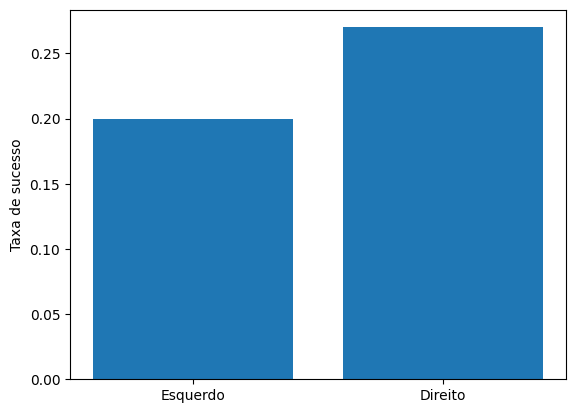

In [ ]:
plt.bar([0, 1], [0.2, 0.27], )
x_ticks = ['Esquerdo', 'Direito']
plt.xticks(range(len(x_ticks)), x_ticks)
plt.ylabel('Taxa de sucesso')

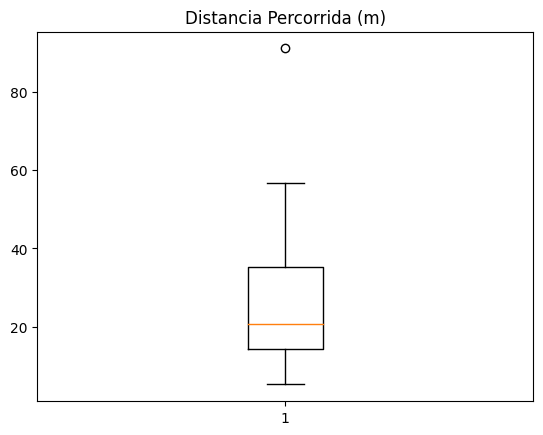

In [ ]:
plt.boxplot(df_dados_one_hot['distancia_percorrida_x'])
plt.title('Distancia Percorrida (m)')
plt.show()

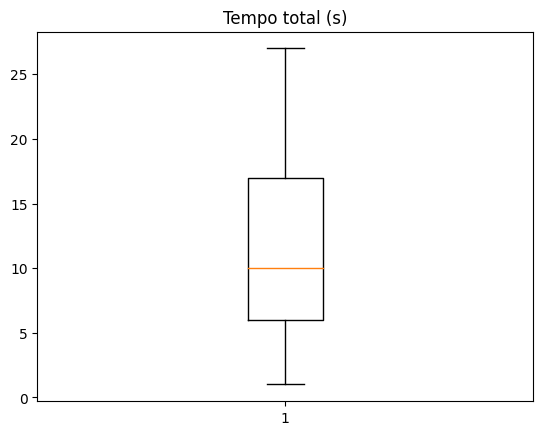

In [ ]:
plt.boxplot(df_dados_one_hot['tempo_total'])
plt.title('Tempo total (s)')
plt.show()

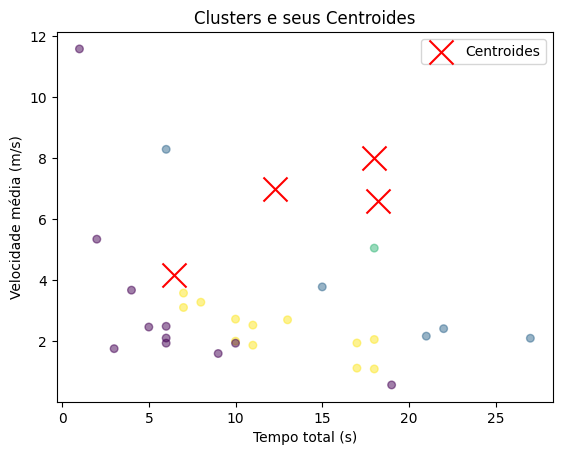

In [ ]:
centroides = kmeans.cluster_centers_
rotulos = kmeans.labels_

# Plotar os dados de entrada
plt.scatter(df_dados_one_hot['tempo_total'], df_dados_one_hot['velocidade_media_bola'], c=rotulos, s=30, cmap='viridis', alpha=0.5)

# Plotar os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', marker='x', label='Centroides')

plt.title('Clusters e seus Centroides')
plt.xlabel('Tempo total (s)')
plt.ylabel('Velocidade média (m/s)')
plt.legend()
plt.show()

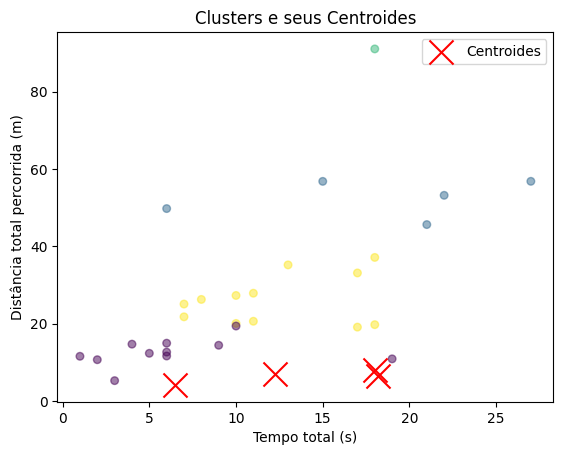

In [ ]:
centroides = kmeans.cluster_centers_
rotulos = kmeans.labels_

# Plotar os dados de entrada
plt.scatter(df_dados_one_hot['tempo_total'], df_dados_one_hot['distancia_percorrida_x'], c=rotulos, s=30, cmap='viridis', alpha=0.5)

# Plotar os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', marker='x', label='Centroides')

plt.title('Clusters e seus Centroides')
plt.xlabel('Tempo total (s)')
plt.ylabel('Distância total percorrida (m)')
plt.legend()
plt.show()

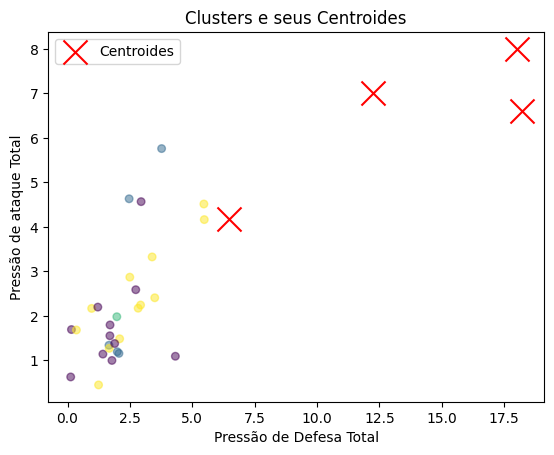

In [ ]:
centroides = kmeans.cluster_centers_
rotulos = kmeans.labels_

# Plotar os dados de entrada
plt.scatter(df_dados_one_hot['pressao_defesa_total'], df_dados_one_hot['pressao_ataque_total'], c=rotulos, s=30, cmap='viridis', alpha=0.5)

# Plotar os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', marker='x', label='Centroides')

plt.title('Clusters e seus Centroides')
plt.xlabel('Pressão de Defesa Total')
plt.ylabel('Pressão de ataque Total')
plt.legend()
plt.show()

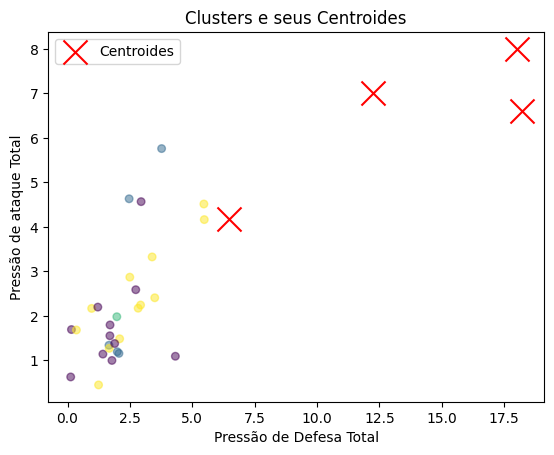

In [ ]:
centroides = kmeans.cluster_centers_
rotulos = kmeans.labels_

# Plotar os dados de entrada
plt.scatter(df_dados_one_hot['pressao_defesa_total'], df_dados_one_hot['pressao_ataque_total'], c=rotulos, s=30, cmap='viridis', alpha=0.5)

# Plotar os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', marker='x', label='Centroides')

plt.title('Clusters e seus Centroides')
plt.xlabel('Pressão de Defesa Total')
plt.ylabel('Pressão de ataque Total')
plt.legend()
plt.show()

In [ ]:
dados = np.array(df_dados_filtrado.values)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
# Separar as variáveis independentes (X) da variável dependente (y)
X = df_dados_one_hot.drop('grande_area', axis=1)
y = df_dados_one_hot['grande_area']

In [ ]:
y.value_counts()

,count
grande_area,
False,887
True,177


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
grande_area,
False,704
True,147


In [ ]:
y_test.value_counts()

,count
grande_area,
False,183
True,30


In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Criar o modelo da rede neural
model = keras.Sequential([
    layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Adiciona Dropout para regularização
    layers.Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(1, activation='sigmoid')  # Usamos sigmoid para uma classificação binária
])

In [ ]:
# Compilar o modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Configurar o EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=60, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/60
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8273 - loss: 0.6938 - val_accuracy: 0.8596 - val_loss: 0.6225
Epoch 2/60
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7829 - loss: 0.6697 - val_accuracy: 0.8596 - val_loss: 0.5762
Epoch 3/60
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8133 - loss: 0.6140 - val_accuracy: 0.8596 - val_loss: 0.5457
Epoch 4/60
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8268 - loss: 0.5820 - val_accuracy: 0.8596 - val_loss: 0.5209
Epoch 5/60
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8044 - loss: 0.5925 - val_accuracy: 0.8596 - val_loss: 0.5021
Epoch 6/60
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8211 - loss: 0.5367 - val_accuracy: 0.8596 - val_loss: 0.4848
Epoch 7/60
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8152 - loss: 0.5483 - val_accuracy: 0.8596 - val_loss: 0.4772
Epoch 8/60
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7980 - loss: 0.5478 - val_accuracy: 0.8596 - val_loss:

In [ ]:
# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.3870 
Loss: 0.3701, Accuracy: 0.8592


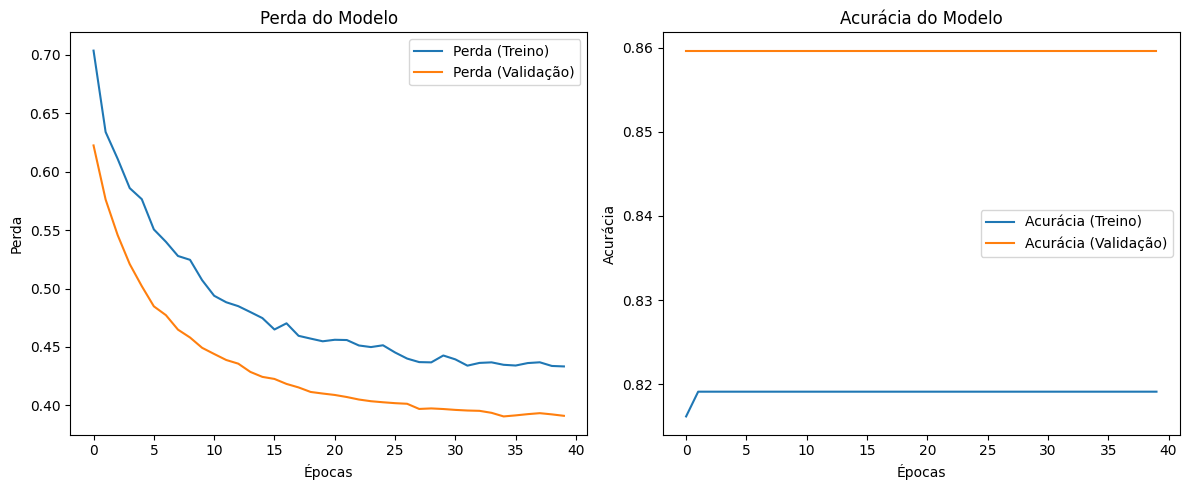

In [ ]:
# Plotar o histórico de perda e acurácia
plt.figure(figsize=(12, 5))

# Gráfico de perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda (Treino)')
plt.plot(history.history['val_loss'], label='Perda (Validação)')
plt.title('Perda do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia (Treino)')
plt.plot(history.history['val_accuracy'], label='Acurácia (Validação)')
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_true = y_test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
from sklearn.metrics import confusion_matrix

# Criando a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Convertendo para um DataFrame para melhor visualização
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])

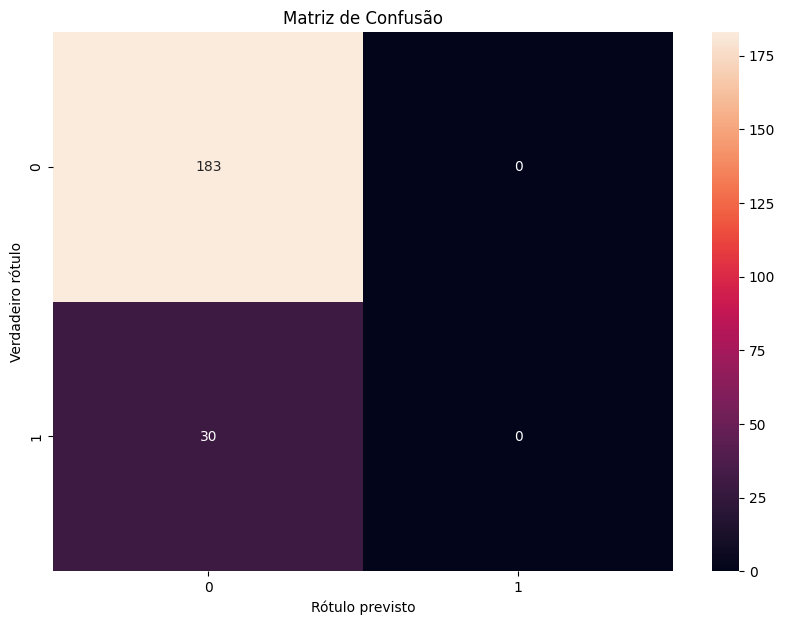

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro rótulo')
plt.xlabel('Rótulo previsto')
plt.show()